In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns #Permite generar graficos elegantes
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
plt.rcParams['figure.figsize']=(16,9)#Configurar ancho y alto de los graficos
plt.style.use('ggplot')

In [ ]:
data=pd.read_csv('comprar_alquilar.csv')
data.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


In [ ]:
print(data.groupby('comprar').size())# Imprime la cantidad de personas a las cuales el bco le recomendo comprar o no
#si observa el resultado: a 135 personas no se le recomienda comprar
# a 67 personas si se le recomienda comprar una casa

comprar
0    135
1     67
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb920e1b610>,
      dtype=object)

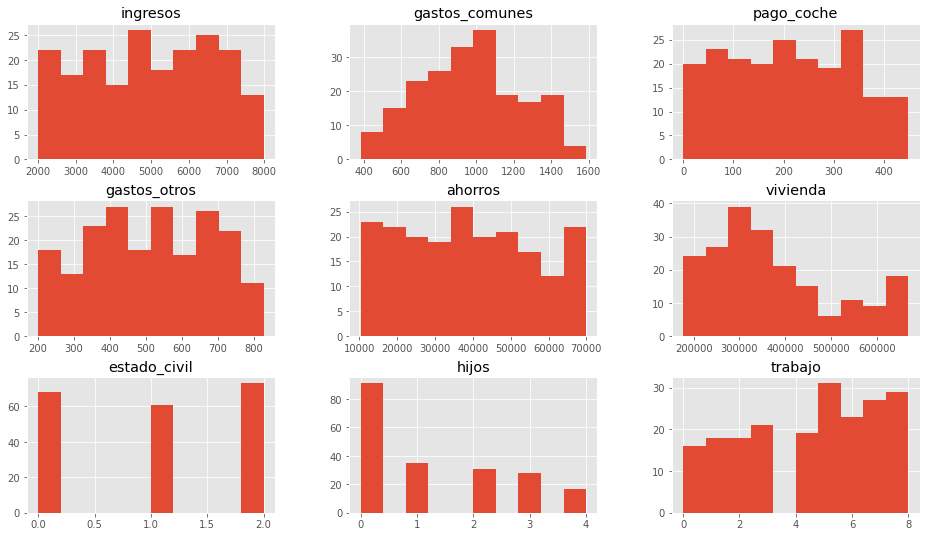

In [ ]:
#Crean un grafico de histograma para mostrar un conteo de cliente por variable, excepto la variable comprar
plt.rcParams['figure.figsize']=(16,9)
data.drop(['comprar'],axis=1).hist()
#observar el grafico para la variable ingresos: en el eje x se muestran los importes de ingresos
#y en el eje 'y' la cantidad

In [ ]:
#opcionalmente puede preparar los datos de entrada, agrupando en variables algunos de los gastos:
data['gastos']=(data['gastos_comunes'] + data['gastos_otros'] + data['pago_coche'])
data['financiar']=(data['vivienda'] - data['ahorros'])
data.drop(['gastos_comunes', 'gastos_otros', 'pago_coche'], axis=1).head()

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
0,6000,50000,400000,0,2,2,1,1600,350000
1,6745,43240,636897,1,3,6,0,1496,593657
2,6455,57463,321779,2,1,8,1,1926,264316
3,7098,54506,660933,0,0,3,0,1547,606427
4,6167,41512,348932,0,0,3,1,1606,307420


In [ ]:
reduced=data.drop(['gastos_comunes', 'gastos_otros', 'pago_coche'], axis=1)
reduced.describe()# Generar un resumen estadistico para todos los registros del dataframe "reduced"


,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683,1698.752475,334599.970297
std,1682.862556,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988,324.838005,126607.099497
min,2008.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000,1007.000000,154716.000000
25%,3513.750000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000,1430.500000,240410.250000
50%,4947.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000,1669.500000,301177.000000
75%,6374.500000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000,1928.000000,393413.000000
max,7984.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000,2543.000000,618621.000000


In [ ]:
#A continuacion debera almacenar en X, todas las variables excepto 'comprar'
#ademas en 'y' debera almacenar la variable comprar
X=data.drop(['comprar'],axis=1) #almacenar todas las filas y todas las variable excepto 'comprar'
y=data['comprar'] #almacenar todas las filas y solo la variable comprar

In [ ]:
#en vez de utilizar las 11 columnas del dataframe 'data', vamos a utilizar una clase llamada 'SelectKBest'
#con la que seleccionaremos las 5 mejores variables para la clasificacion
best=SelectKBest(k=5) #Seleccionando las 5 mejores
X_new=best.fit_transform(X,y) # almacenar en la variable X_new las 5 mejores caracteristicas. Este es un resultado array
X_new.shape #Convertir el array obtenido en una fila
selected=best.get_support(indices=True)
print(X.columns[selected])


Index(['ingresos', 'ahorros', 'hijos', 'trabajo', 'financiar'], dtype='object')


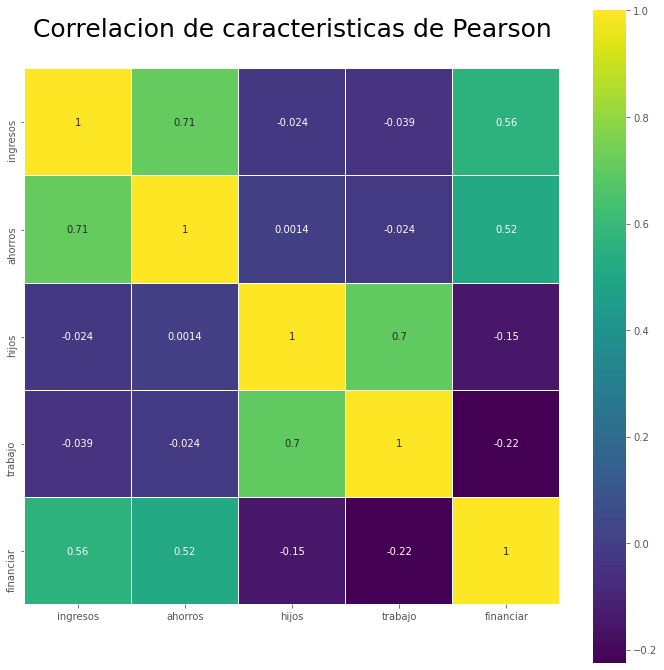

In [ ]:
#Generando un grafico de Pearson: las 5 mejores caracteristicas obtenidas son las que mas aportan en el 
#momento de clasificar, usando el grafico de Pearson, deberá mostrar el grado de correlacion que tiene
#una variable con respecto a la otra. -1 --> correlacion fuerte. 0 -->correlacion debil. 1 --> correlacion fuerte
used_features=X.columns[selected]
colormap=plt.cm.viridis # colores al grafico
plt.figure(figsize=(12,12)) #Tamaño del grafico
plt.title("Correlacion de caracteristicas de Pearson",y=1.05, size=25) #y es margen
sns.heatmap(data[used_features].astype(float).corr(), linewidths=0.1, vmax=1.0, square=True,
            cmap=colormap,linecolor='white', annot=True)


In [ ]:
#Dividir los datos en grupo de Entrenamiento y grupo de prueba:
#el dataframe 'data' se va a dividir en: X_train(80%), X_test(20%)
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)
X_train,X_test=train_test_split(data,test_size=0.2, random_state=6)
y_train=X_train['comprar']
y_test=X_test['comprar']

In [ ]:
#Creando el modelo naive bayes
naive_bayes=GaussianNB()
#Utilizando el metodo fit, entrenar el modelo
naive_bayes.fit(X_train[used_features].values, y_train)
#Usando el grupo de pruebas, realizar la prediccion
y_pred=naive_bayes.predict(X_test[used_features])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)*100

90.2439024390244

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[24  0]
 [ 4 13]]


In [ ]:
(24+13)/(4+13+24+0)

0.9024390243902439

In [ ]:
#Generando 2 prediccion:
#caso 1: el cliente tiene una familia sin hijos, con ingresos mensuales de 2000 dolares,
#quiere comprar una casa de 200,000 dolares y tiene ahorrado 5000 dolares
#caso 2: el cliente tiene una familia con 2 hijos, con ingresos mensualres de 6000 dolares,
#quiere comprar una casa de 320,000 dolares y tiene ahorrado 34000 dolares
print(naive_bayes.predict([[2000,5000,0,5,200000],[6000,34000,2,5,320000]]))
#Segun el resultado para el primer caso no se le recomienda comprar una casa, deberia alquilar
#para el segundo caso sí se le recomienda comprar una casa

[0 1]
